In [1]:
#for panel 1 without filtering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt









In [7]:
x1=pd.read_csv("Copy of Irradiance-1MW-5Min-2014.csv",header=None)

In [8]:
x2=pd.read_csv("Copy of Irradiance-1MW-5Min-2015.csv",header=None)

In [9]:
X=pd.concat([x1,x2],ignore_index=True)

In [10]:
y=pd.read_csv("11MW-GenerationFile-5Min.csv",header=None)

In [11]:
y1=y.iloc[:,[4]].values

In [12]:
y2=y.iloc[:,[5]].values

In [13]:
y3=y.iloc[:,[6]].values

In [14]:
y4=y.iloc[:,[7]].values

In [15]:
y5=y.iloc[:,[8]].values

In [16]:
y6=y.iloc[:,[9]].values

In [17]:
y_np=y2+y3+y4+y5+y6

In [18]:
y_np=pd.DataFrame(y_np)

In [19]:
y_np1=y_np.iloc[:52273,:].values

In [20]:
y_np2=y_np.iloc[52273:,:].values

In [21]:
X2=X.iloc[52273:,:].values

In [22]:
X1=X.iloc[:52273,:].values

In [23]:
X1.shape==y_np1.shape

True

In [24]:
X2.shape==y_np2.shape

True

In [25]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error


In [26]:
num_folds = 10 
seed = 7 
scoring = 'neg_mean_squared_error'



In [23]:
models = [] 
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso())) 
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor())) 


In [24]:
results = [] 
names = [] 
for name, model in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X, y_np, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: -23.981167 (12.539219)
LASSO: -23.979482 (12.541444)
EN: -23.980287 (12.540362)
KNN: -19.995912 (6.285789)
CART: -19.953886 (6.255710)


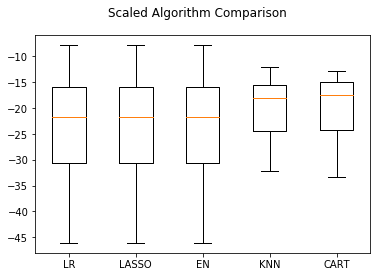

In [24]:
# Compare Algorithms 
fig = plt.figure() 
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [43]:
knc=KNeighborsRegressor(n_neighbors=25,metric="minkowski",p=2)
knc.fit(X1,y_np1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=25, p=2,
          weights='uniform')

In [44]:
y_pred=knc.predict(X2)

In [45]:
knc.score(X1,y_np1)

0.916640562051621

In [46]:
knc.score(X2,y_np2)

0.5876914577518224

In [49]:
r=DecisionTreeRegressor(random_state=0)

In [50]:
r.fit(X1,y_np1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [51]:
y_pred_using_d=r.predict(X2)

In [52]:
r.score(X1,y_np1)

0.9399659235854607

In [53]:
r.score(X2,y_pred_using_d)

1.0

In [57]:
y_pred_d1=r.predict(155.4)

In [58]:
y_pred_d1

array([11.50182121])

,0
0,1.500000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [65]:
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())]))) 
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())]))) 
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())]))) 
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())]))) 
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))) 
results = [] 
names = [] 
for name, model in pipelines: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X1, y_np1, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)


ScaledLR: -20.774111 (12.779454)
ScaledLASSO: -20.991714 (10.147731)
ScaledEN: -30.104176 (13.425946)
ScaledKNN: -11.695505 (2.953819)
ScaledCART: -12.736027 (2.975760)


c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d arr

ScaledSVR: -10.065043 (3.613691)


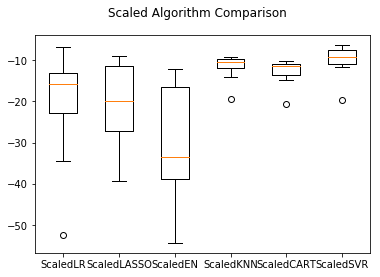

In [66]:
#for svr parameter tuning
# Compare Algorithms 
fig = plt.figure() 
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [68]:
scaler = StandardScaler().fit(X1) 
rescaledX = scaler.transform(X1) 
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0] 
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid'] 
param_grid = dict(C=c_values, kernel=kernel_values) 
model = SVR() 
kfold = KFold(n_splits=num_folds, random_state=seed) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, y_np1) 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))

c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d arr

KeyboardInterrupt: 

In [25]:
ensembles = [] 
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())]))) 
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())]))) 
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())]))) 
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))



In [27]:
results = [] 
names = [] 
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X1, y_np1, cv=kfold, scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d arr

ScaledAB: -12.147735 (3.191616)


c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d arr

ScaledGBM: -10.043815 (3.359316)


c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed 

ScaledRF: -12.279399 (2.868038)


c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed 

ScaledET: -12.565735 (2.911497)


c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


model.fit(X1,y_np1)

In [30]:
scaler = StandardScaler().fit(X1) 
rescaledX = scaler.transform(X1) 
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400])) 
model = GradientBoostingRegressor(random_state=seed) 
kfold = KFold(n_splits=num_folds, random_state=seed) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, y_np1)

c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d arr

c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d arr

c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d arr

In [31]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10.003444 using {'n_estimators': 50}
-10.003444 (3.215828) with: {'n_estimators': 50}
-10.043683 (3.359279) with: {'n_estimators': 100}
-10.060255 (3.370054) with: {'n_estimators': 150}
-10.079799 (3.376457) with: {'n_estimators': 200}
-10.098059 (3.377604) with: {'n_estimators': 250}
-10.115602 (3.373936) with: {'n_estimators': 300}
-10.137914 (3.372061) with: {'n_estimators': 350}
-10.156282 (3.371065) with: {'n_estimators': 400}


In [32]:
rfr=GradientBoostingRegressor(n_estimators=50)

In [33]:
rfr.fit(X1,y_np1)

c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [34]:
y_pred=rfr.predict(X2)

In [35]:
rfr.score(X1,y_np1)

0.9145411127801589

In [36]:
rfr.score(X2,y_np2)

0.5978816139355595

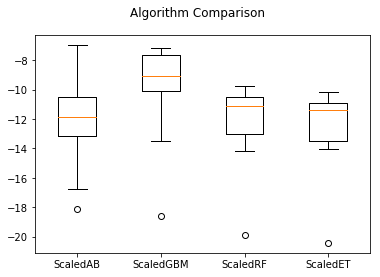

In [37]:
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [38]:
#using ann predicting solar forecasting

In [2]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline


Using TensorFlow backend.


In [3]:
from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler 
import math
from keras.callbacks import LearningRateScheduler

In [4]:
seed=7
np.random.seed(seed)

In [5]:
epochs = 50
def baseline_model(): 
    # create model 
    model = Sequential() 
    model.add(Dense(34, input_dim=34, init= "normal" , activation= "relu" )) 
    model.add(Dense(16, init= "normal" , activation= "relu" ))
    model.add(Dense(1, init= "normal" , activation= "sigmoid" )) 
    # Compile model
     
    learning_rate = 0.1 
    decay_rate = learning_rate / epochs 
    momentum = 0.8 
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss= "binary_crossentropy" , optimizer=sgd, metrics=[ "accuracy" ]) 
    return model

In [28]:
model = Sequential() 
model.add(Dense(4, input_dim=1, init= "normal" , activation= "relu" )) 
model.add(Dense(4, init= "normal" , activation= "relu" ))
model.add(Dense(5, init= "normal" , activation= "relu" ))
model.add(Dense(3, init= "normal" , activation= "relu" ))
model.add(Dense(1, init= "normal")) 
# Compile model     
learning_rate = 0.1 
decay_rate = learning_rate / 400 
momentum = 0.8 
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss= "mean_squared_error", optimizer=sgd, metrics=[ "accuracy" ])
model.fit(X1, y_np1, nb_epoch=400, batch_size=2, verbose=2)


c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="normal", input_dim=1, activation="relu")`
  
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="normal", activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, kernel_initializer="normal", activation="relu")`
  after removing the cwd from sys.path.
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, kernel_initializer="normal", activation="relu")`
  """
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-pa

Epoch 1/400
 - 23s - loss: 110.5242 - acc: 0.0054
Epoch 2/400


KeyboardInterrupt: 

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler=MinMaxScaler()

In [31]:
X1=scaler.fit_transform(X1)

In [32]:
X1=scaler.transform(X1)

In [33]:
X1

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.00077277],
       [0.00077765],
       [0.00077678]])

In [34]:
y_np1=scaler.fit_transform(y_np1)

In [35]:
y_np1

array([[0.03966737],
       [0.        ],
       [0.        ],
       ...,
       [0.67465523],
       [0.72031403],
       [0.70249471]])

In [36]:
y_np1

array([[0.03966737],
       [0.        ],
       [0.        ],
       ...,
       [0.67465523],
       [0.72031403],
       [0.70249471]])

In [37]:
def step_decay(epoch): 
    initial_lrate = 0.1 
    drop = 0.5 
    epochs_drop = 10.0 
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop)) 
    return lrate

In [38]:
model = Sequential() 
model.add(Dense(6, input_dim=1, init= "normal" , activation= "relu" ))
model.add(Dense(5, init= "normal" , activation= "relu" ))
model.add(Dense(5, init= "normal" , activation= "relu" ))
model.add(Dense(7, init= "normal" , activation= "relu" ))
model.add(Dense(1, init= "normal"))
sgd = SGD(lr=0.00, momentum=0.95, decay=0.0, nesterov=False) 
model.compile(loss= "mean_squared_error" , optimizer=sgd, metrics=[ "accuracy" ])

c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, kernel_initializer="normal", input_dim=1, activation="relu")`
  
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, kernel_initializer="normal", activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, kernel_initializer="normal", activation="relu")`
  after removing the cwd from sys.path.
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, kernel_initializer="normal", activation="relu")`
  """
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-pa

In [40]:
# learning schedule callback 
lrate = LearningRateScheduler(step_decay) 
callbacks_list = [lrate] 
# Fit the model 
model.fit(X1, y_np1,nb_epoch=200, batch_size=10, callbacks=callbacks_list, verbose=2) 


c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/200
 - 4s - loss: 0.0881 - acc: 0.6090
Epoch 2/200
 - 5s - loss: 0.0871 - acc: 0.6104
Epoch 3/200
 - 5s - loss: 0.0884 - acc: 0.6108
Epoch 4/200
 - 5s - loss: 0.0877 - acc: 0.6121
Epoch 5/200
 - 5s - loss: 0.0840 - acc: 0.6132
Epoch 6/200
 - 5s - loss: 0.0852 - acc: 0.6128
Epoch 7/200
 - 4s - loss: 0.0885 - acc: 0.6104
Epoch 8/200
 - 6s - loss: 0.0869 - acc: 0.6108
Epoch 9/200
 - 5s - loss: 0.0867 - acc: 0.6109
Epoch 10/200
 - 5s - loss: 0.0793 - acc: 0.6138
Epoch 11/200
 - 4s - loss: 0.0784 - acc: 0.6140
Epoch 12/200
 - 4s - loss: 0.0789 - acc: 0.6140
Epoch 13/200
 - 5s - loss: 0.0794 - acc: 0.6140
Epoch 14/200
 - 4s - loss: 0.0789 - acc: 0.6140
Epoch 15/200
 - 4s - loss: 0.0787 - acc: 0.6140
Epoch 16/200
 - 5s - loss: 0.0794 - acc: 0.6140
Epoch 17/200
 - 4s - loss: 0.0796 - acc: 0.6135
Epoch 18/200
 - 5s - loss: 0.0807 - acc: 0.6140
Epoch 19/200
 - 4s - loss: 0.0792 - acc: 0.6140
Epoch 20/200
 - 4s - loss: 0.0756 - acc: 0.6140
Epoch 21/200
 - 4s - loss: 0.0749 - acc: 0.6140
E

Epoch 171/200
 - 5s - loss: 0.0717 - acc: 0.6140
Epoch 172/200
 - 5s - loss: 0.0717 - acc: 0.6140
Epoch 173/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 174/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 175/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 176/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 177/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 178/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 179/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 180/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 181/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 182/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 183/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 184/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 185/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 186/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 187/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 188/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 189/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 190/200
 - 4s - loss: 0.0717 - acc: 0.6140
Epoch 191/200
 - 4s 

In [85]:
def baseline_model(): 
    # create model 
    model = Sequential() 
    model.add(Dense(6, input_dim=1, init= "normal" , activation= "relu" ))
    model.add(Dense(5, init= "normal" , activation= "relu" ))
    model.add(Dense(5, init= "normal" , activation= "relu" ))
    model.add(Dense(7, init= "normal" , activation= "relu" ))
    model.add(Dense(1, init= "normal"))
    sgd = SGD(lr=0.10, momentum=0.95, decay=0.0, nesterov=False) 
    model.compile(loss= "mean_squared_error" , optimizer=sgd, metrics=[ "accuracy" ]) 
    return model

In [70]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=3000, batch_size=1, verbose=0)

In [72]:
estimators = [] 
estimators.append(( "standardize" , StandardScaler())) 
estimators.append(( "mlp" , KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=10, verbose=0))) 
pipeline = Pipeline(estimators)

In [75]:
kfold = KFold(n_splits=10, random_state=seed) 
results = cross_val_score(pipeline, X1, y_np1, cv=kfold) 
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, kernel_initializer="normal", activation="relu", input_dim=1)`
  after removing the cwd from sys.path.
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, kernel_initializer="normal", activation="relu")`
  """
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, kernel_initializer="normal", activation="relu")`
  
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, kernel_initializer="normal", activation="relu")`
  import sys
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call

c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, kernel_initializer="normal", activation="relu", input_dim=1)`
  after removing the cwd from sys.path.
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, kernel_initializer="normal", activation="relu")`
  """
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, kernel_initializer="normal", activation="relu")`
  
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, kernel_initializer="normal", activation="relu")`
  import sys
c:\users\arbaz\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call

Baseline: -0.10 (0.01) MSE


In [76]:
pipeline.fit(X1,y_np1,batch_size=10,epochs=100)

ValueError: not enough values to unpack (expected 2, got 1)

In [77]:
X1

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.82763772],
       [0.83286648],
       [0.83193277]])

In [78]:
s=StandardScaler()

In [79]:
X11=s.fit_transform(X1)

In [80]:
X11

array([[-0.58425347],
       [-0.58425347],
       [-0.58425347],
       ...,
       [ 3.43335923],
       [ 3.45874126],
       [ 3.45420875]])

In [82]:
y11=s.fit_transform(y_np1)

In [27]:
# learning schedule callback 
lrate = LearningRateScheduler(step_decay) 
callbacks_list = [lrate] 
# Fit the model 
model.fit(X1, y_np1,nb_epoch=150, batch_size=40, callbacks=callbacks_list, verbose=2) 


NameError: name 'step_decay' is not defined

In [41]:
y_pred=model.predict(X2)

In [56]:
from sklearn.metrics import mean_squared_error
import math
rms=math.sqrt(mean_squared_error(y_np2,y_pred))

In [57]:
rms

0.22682017705863794

In [51]:
from sklearn.preprocessing import MinMaxScaler
     
    

In [53]:
sc=MinMaxScaler()


In [54]:
y_pred

array([[0.16829927],
       [0.16829616],
       [0.16829585],
       ...,
       [0.16908982],
       [0.16908982],
       [0.16908982]], dtype=float32)

In [55]:
y_np2=sc.fit_transform(y_np2)